### Guided Practice: Logit Function and Odds

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1. / (1 + np.exp(-logit))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

In [160]:
for odds in odds_set:
    print(sigmoid_func(logit_func(odds)))

0.833333333333
0.952380952381
0.52380952381
0.642857142857
0.615384615385


In [162]:
x

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 6

C:\Users\Ayham\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


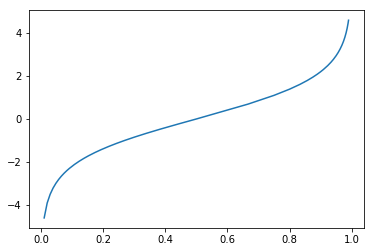

In [161]:
x1 = [float(i) / 100 for i in range(0, 101, 1)]
x2 = [x for x in range(2,100)]
x = x1 + x2
y = sigmoid_func(logit_func(x))
logit = logit_func(x)
plt.plot(y,logit)

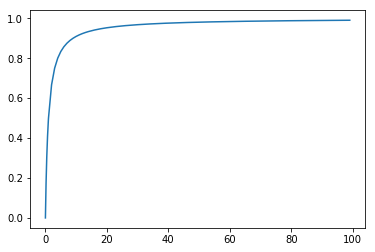

In [28]:
plt.plot(x,y)

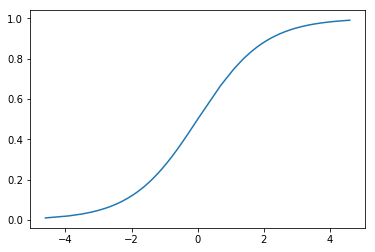

In [29]:
plt.plot(logit,y)

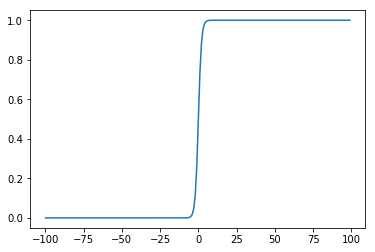

In [30]:
x = pd.Series(list(range(-100,100)))
y = x.apply(sigmoid_func)
plt.plot(x,y,)

In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [172]:
lm = LogisticRegression()

df = pd.read_csv('../../assets/dataset/collegeadmissions.csv')

In [173]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [174]:
df = df.join(pd.get_dummies(df['rank']))

In [175]:
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [176]:
lm.fit(df[['gre', 'gpa', 1, 2, 3,]], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [177]:
df['predict'] = lm.predict(df[['gre', 'gpa', 1, 2, 3,]])
df['prob'] = lm.predict_proba(df[['gre', 'gpa', 1, 2, 3,]]).T[1]

In [178]:
lm.predict_proba(df[['gre', 'gpa', 1, 2, 3,]]).T[:]
0.81831149
0.18168851

0.18168851

In [179]:
df[(df['predict'] == 0) & (df['prob']>= 0.5)]

,admit,gre,gpa,rank,1,2,3,4,predict,prob


In [180]:
import numpy as np

In [181]:
# Coefficients represent the log-odds. This includes the y-intercept. 
print(lm.coef_)
print(lm.intercept_)
print(df.admit.mean())

[[  1.63913356e-03   4.33354702e-04   1.15220976e+00   5.14395667e-01
   -3.62326169e-02]]
[-2.09315184]
0.3175


In [182]:
# You can easily convert these into odds using numpy.exp()
print(np.exp(lm.coef_))
print(np.exp(lm.intercept_))
print(df.admit.mean())

[[ 1.00164048  1.00043345  3.16517946  1.67262737  0.96441593]]
[ 0.12329791]
0.3175


The above makes it more clear that a schools rank as it approaches 4 decreases the odds of getting admitted.
The accuracy of the model with all features (removing one rank) is ~70%.

In [183]:
feature_set = df[['gre', 'gpa', 1, 2, 3,]]
print(lm.score(feature_set, df['admit']))

0.7


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

In [187]:
roc_curve(df[['admit']], probas[:,1])

(array([ 0.        ,  0.003663  ,  0.003663  ,  0.00732601,  0.00732601,
         0.01465201,  0.01465201,  0.01831502,  0.02197802,  0.02197802,
         0.02930403,  0.02930403,  0.03663004,  0.03663004,  0.04029304,
         0.04029304,  0.05128205,  0.05128205,  0.05494505,  0.05494505,
         0.05860806,  0.05860806,  0.06593407,  0.06593407,  0.07326007,
         0.07326007,  0.07692308,  0.07692308,  0.08058608,  0.08058608,
         0.0952381 ,  0.0952381 ,  0.10989011,  0.10989011,  0.11721612,
         0.11721612,  0.12087912,  0.12087912,  0.12454212,  0.12454212,
         0.13919414,  0.14652015,  0.14652015,  0.16483516,  0.16483516,
         0.16849817,  0.16849817,  0.17582418,  0.17582418,  0.18315018,
         0.18315018,  0.18681319,  0.18681319,  0.19047619,  0.19047619,
         0.19413919,  0.19413919,  0.1978022 ,  0.1978022 ,  0.21978022,
         0.21978022,  0.22710623,  0.22710623,  0.23443223,  0.23443223,
         0.23809524,  0.23809524,  0.24175824,  0.2

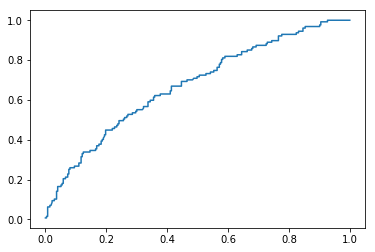

In [186]:
lm.fit(df[['gre', 'gpa', 1, 2, 3,]], df['admit'])
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

In [ ]:
df[['admit']].count()

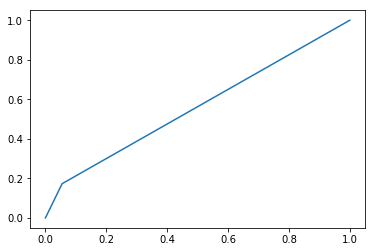

In [74]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

In [189]:
roc_curve(df[['admit']], actuals)

(array([ 0.        ,  0.05494505,  1.        ]),
 array([ 0.        ,  0.17322835,  1.        ]),
 array([2, 1, 0], dtype=int64))

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [17]:
roc_auc_score(df['admit'], lm.predict(feature_set))

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

### Teaching Notes

Note this is just one approach optimized for Area Under the Curve.

Age will need some work (since it is missing for a significant portion), and other data cleanup simplifies the data problem a little.

In [142]:
titanic = pd.read_csv('../../assets/dataset/titanic.csv')

In [143]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
titanic.set_index('PassengerId', inplace=True)
titanic = titanic.join(pd.get_dummies(titanic.Pclass))
titanic['is_male'] = titanic.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [145]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,is_male
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,1


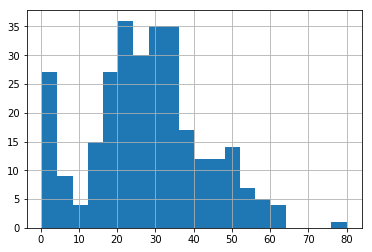

In [146]:
%matplotlib inline
titanic.groupby('Survived').Age.get_group(1).hist(bins=20)

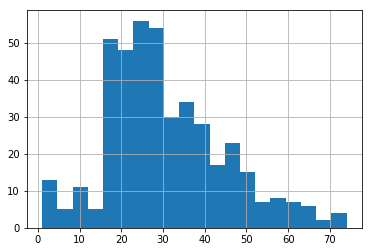

In [147]:
titanic.groupby('Survived').Age.get_group(0).hist(bins=20)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

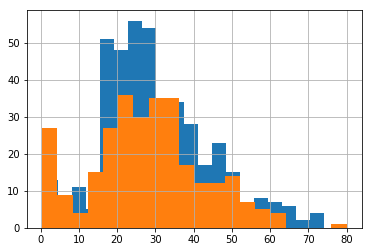

In [148]:
titanic.groupby('Survived').Age.hist(bins=20)

In [149]:
grouped_df = titanic.groupby('Survived').Age
print(grouped_df.groups.keys())
print(grouped_df.groups)
print(grouped_df.groups.values())

dict_keys([0, 1])
{0: Int64Index([  1,   5,   6,   7,   8,  13,  14,  15,  17,  19,
            ...
            878, 879, 882, 883, 884, 885, 886, 887, 889, 891],
           dtype='int64', name='PassengerId', length=549), 1: Int64Index([  2,   3,   4,   9,  10,  11,  12,  16,  18,  20,
            ...
            866, 867, 870, 872, 875, 876, 880, 881, 888, 890],
           dtype='int64', name='PassengerId', length=342)}
dict_values([Int64Index([  1,   5,   6,   7,   8,  13,  14,  15,  17,  19,
            ...
            878, 879, 882, 883, 884, 885, 886, 887, 889, 891],
           dtype='int64', name='PassengerId', length=549), Int64Index([  2,   3,   4,   9,  10,  11,  12,  16,  18,  20,
            ...
            866, 867, 870, 872, 875, 876, 880, 881, 888, 890],
           dtype='int64', name='PassengerId', length=342)])


In [150]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,is_male
PassengerId,,,,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0,1,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,0,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0,0,1,0
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,0,0,1
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0,0,1,1


In [151]:
titanic['Age'] = titanic.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)

In [152]:
from sklearn import grid_search, cross_validation

feature_set = titanic[['is_male', 1, 2, 'Fare', 'Age', 'had_parents', 'had_siblings']]
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(titanic), n_folds=10),
    scoring='roc_auc'


gs.fit(feature_set, titanic.Survived)
gs.grid_scores_
print(gs.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [153]:
mod = gs.best_estimator_
#mod.predict_proba()
titanic['prob'] = mod.predict_proba(feature_set).T[1]
titanic['predict'] = mod.predict(feature_set)

In [154]:
print(titanic[titanic.predict == 1].prob.min())
print(titanic[titanic.predict == 0].prob.max())

0.50454608364
0.497598208263


In [155]:
gs.grid_scores_

[mean: 0.83905, std: 0.02899, params: {'C': 100000, 'class_weight': None},
 mean: 0.83905, std: 0.02934, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.83900, std: 0.02900, params: {'C': 10000, 'class_weight': None},
 mean: 0.83905, std: 0.02934, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.83900, std: 0.02900, params: {'C': 1000, 'class_weight': None},
 mean: 0.83905, std: 0.02934, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.83894, std: 0.02869, params: {'C': 100, 'class_weight': None},
 mean: 0.83910, std: 0.02936, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.83909, std: 0.02895, params: {'C': 10, 'class_weight': None},
 mean: 0.83906, std: 0.02946, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.84019, std: 0.02962, params: {'C': 1, 'class_weight': None},
 mean: 0.83890, std: 0.02989, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.83737, std: 0.03051, params: {'C': 0.1, 'class_weight': None},
 mean: 0.83560, std: 0

In [156]:
print(gs.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [157]:
roc_auc_score(titanic['Survived'], gs.predict(feature_set))

0.78403317035758791

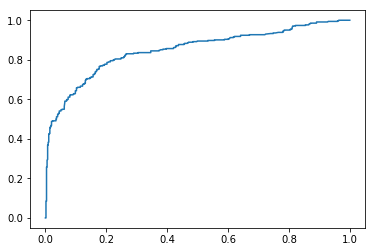

In [158]:
actuals = gs.predict(feature_set) 
probas = gs.predict_proba(feature_set)
plt.plot(roc_curve(titanic[['Survived']], probas[:,1])[0], roc_curve(titanic[['Survived']], probas[:,1])[1])